In [78]:
def delcolumns():
    
    rossmann_df.drop('Number_Of_Sales',1,inplace=True)
    rossmann_df.drop('Price',1,inplace=True)
    rossmann_df.drop('ID',1,inplace=True)
    test_df.drop('ID',1,inplace=True)
    rossmann_df.drop('Year',1,inplace=True)
    test_df.drop('Year',1,inplace=True)
    rossmann_df.drop('Item_ID_x',1,inplace=True)
    test_df.drop('Item_ID_x',1,inplace=True)  
    col = ['Day']
    rossmann_df.drop(col,1,inplace=True)
    test_df.drop(col,1,inplace=True) 
    
    

In [79]:
%matplotlib inline
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [80]:
# get rossmann, store, & test csv files as a DataFrame
rossmann_df  = pd.read_csv("../input/train.csv") 
test_df      = pd.read_csv("../input/test.csv") 

In [81]:
test_df = test_df.reindex_axis(['ID','Item_ID','Datetime','Category_3', 'Category_2', 'Category_1'],axis=1)

In [ ]:
rossmann_df.info()
print("----------------------------")
test_df.info()

f
test_df['Day'] = test_df['Datetime'].apply(lambda x: int(str(x)[8:10]))

In [88]:
rossmann_df.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales,Day,WeekDay
0,30495_20140101,30495,2014-01-01,0,2.0,90,165.123,1,1,2
1,30375_20140101,30375,2014-01-01,0,2.0,307,68.666,5,1,2
2,30011_20140101,30011,2014-01-01,0,3.0,67,253.314,2,1,2
3,30864_20140101,30864,2014-01-01,0,2.0,315,223.122,1,1,2
4,30780_20140101,30780,2014-01-01,1,2.0,132,28.750,1,1,2


In [85]:
rossmann_df['Datetime'] = pd.to_datetime(rossmann_df['Datetime'])
test_df['Datetime'] = pd.to_datetime(test_df['Datetime'])

In [87]:
rossmann_df['WeekDay'] = rossmann_df['Datetime'].dt.dayofweek

In [90]:
rossmann_df['WeekDay'].unique()

array([2, 3, 4, 5, 6, 0, 1], dtype=int64)

In [99]:
# Date
# Create Year and Month columns
rossmann_df['Year']  = rossmann_df['Datetime'].apply(lambda x: int(str(x)[:4]))
rossmann_df['Month'] = rossmann_df['Datetime'].apply(lambda x: int(str(x)[5:7]))

test_df['Year']  = test_df['Datetime'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Datetime'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
rossmann_df['Datetime'] = rossmann_df['Datetime'].apply(lambda x: (str(x)[:7]))
test_df['Datetime']     = test_df['Datetime'].apply(lambda x: (str(x)[:7]))

In [58]:
rossmann_df.drop(['Datetime'],inplace=True,axis=1)
test_df.drop(['Datetime'],inplace=True,axis=1)

#rossmann_df.Category_1.unique() #category_3 has nan value ( its binary)
#Category_2 has five values  2.,   3.,   1.,   4.,   5.,  nan
# Category_1  has random values and nan

In [59]:
rossmann_df.Category_2.fillna(0,inplace=True)
test_df.Category_2.fillna(0,inplace=True)

In [60]:
rossmann_df = rossmann_df[rossmann_df['Month'] != 0] # removed row with zero value in the month

In [ ]:
    columns = ['Month', 'Category_2', 'Promo']
medians = train.groupby( columns )['Sales'].median()
medians = medians.reset_index()

test2 = pd.merge( test, medians, on = columns, how = 'left' )

rossmann_df['Item_ID'].groupby(rossmann_df['Category_2']).median()

In [101]:
# preview the data
rossmann_df.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales,Day,WeekDay,Year,Month
0,30495_20140101,30495,2014-01,0,2.0,90,165.123,1,1,2,2014,1
1,30375_20140101,30375,2014-01,0,2.0,307,68.666,5,1,2,2014,1
2,30011_20140101,30011,2014-01,0,3.0,67,253.314,2,1,2,2014,1
3,30864_20140101,30864,2014-01,0,2.0,315,223.122,1,1,2,2014,1
4,30780_20140101,30780,2014-01,1,2.0,132,28.750,1,1,2,2014,1


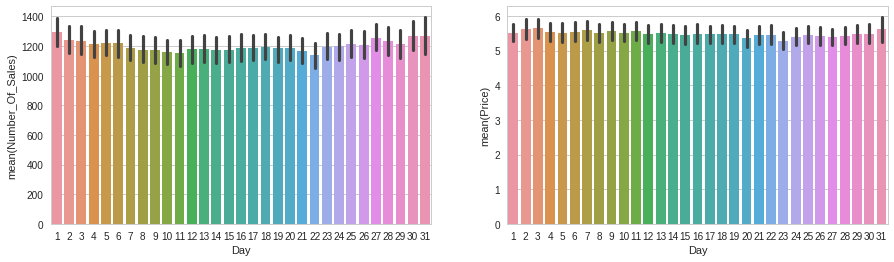

In [122]:
tmp = rossmann_df.loc[(rossmann_df['Month'] == 3 ) & rossmann_df['Month'] == 3 ]
#plt.plot(tmp["WeekDay"],tmp["Price"])

# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='WeekDay', y='Number_Of_Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='WeekDay', y='Price', data=rossmann_df, ax=axis2)

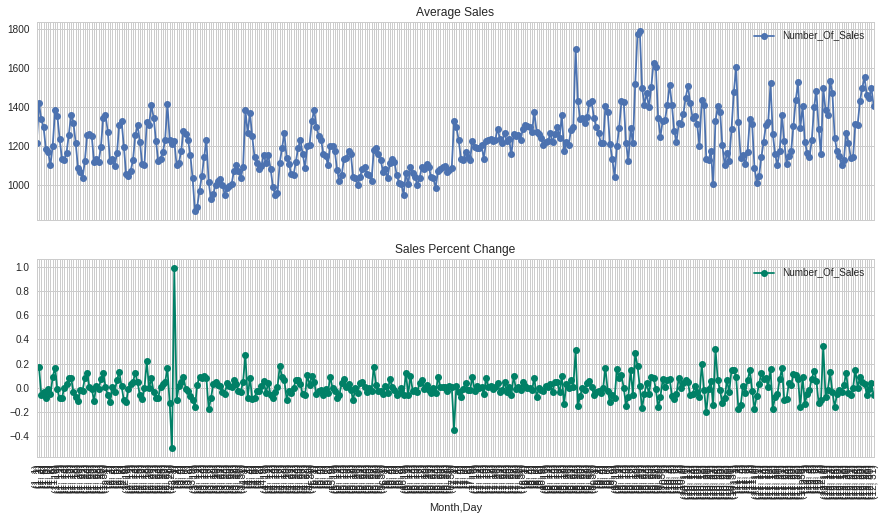

In [73]:
# group by date and get average sales, and precent change
average_sales    = rossmann_df.groupby(['Month','Day'])["c"].mean()
pct_change_sales = rossmann_df.groupby(['Month','Day'])["Number_Of_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

In [62]:
#temp.columns = ['ca2_0','ca2_1', 'ca2_2','ca2_3','ca2_4','ca2_5']
#rossmann_df = rossmann_df.join(rossmann_df.groupby(['Month','Category_2'])['Item_ID'].mean(), on='Category_2', rsuffix='_r')
#test_df = test_df.join(test_df.groupby(['Category_2'])['Month'].mean(), on='Category_2', rsuffix='_r')

rossmann_df_gped = rossmann_df.groupby(['Month','Category_2'], as_index=False)['Item_ID'].mean()
test_df_gped = test_df.groupby(['Month','Category_2'], as_index=False)['Item_ID'].mean()

In [68]:
#pd.merge(po_grouped_df, pol_df, on=['EID','PCODE'], how='inner',suffixes=('_Acc','_Po'))
rossmann_df = pd.merge(rossmann_df,rossmann_df_gped, on=['Month','Category_2'],how='inner' )
test_df = test_df.merge(test_df_gped, on=['Month','Category_2'],how='inner')

In [14]:
 rossmann_df = rossmann_df[rossmann_df.Number_Of_Sales < 400000 ] 

In [ ]:
# Open
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Category_3',hue='Month', data=rossmann_df,palette="husl", ax=axis1)

In [ ]:
# Open
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Category_2',hue='Item_ID', data=rossmann_df,palette="husl", ax=axis1)

In [ ]:
# Using store_df
# Merge store_df with average store sales & customers
avg_item_cat = rossmann_df.groupby(['Month','Category_2'])["Item_ID"].mean().rename("cat2_item").reset_index()

In [ ]:
rossmann_df = pd.merge(rossmann_df, avg_item_cat, on='Category_2')

avg_item_cat = rossmann_df.groupby('Month','Category_3')["Item_ID"].mean().rename("cat3_item").reset_index()
rossmann_df = pd.merge(rossmann_df, avg_item_cat, on='Category_3')
 
    

In [ ]:
rossmann_df.head()

In [ ]:
# Using store_df

# Merge store_df with average store sales & customers
average_sales_customers = rossmann_df.groupby('Store')[["Sales", "Customers"]].mean()
sales_customers_df = DataFrame({'Store':average_sales_customers.index,
                      'Sales':average_sales_customers["Sales"], 'Customers': average_sales_customers["Customers"]}, 
                      columns=['Store', 'Sales', 'Customers'])
store_df = pd.merge(sales_customers_df, store_df, on='Store')

store_df.head()

In [ ]:
test_ID = test_df['ID']
target_sales = rossmann_df['Number_Of_Sales']
target_price = rossmann_df['Price']

delcolumns()

In [ ]:
# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Category_2', y='Number_Of_Sales', data=rossmann_df, order=[0,1,2,3,4,5,6], ax=axis1)

In [ ]:
from sklearn import cross_validation
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Thanks to Chenglong Chen for providing this in the forum
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe


print("Train xgboost model")

params = {'min_child_weight':[4,5],
          'gamma':[i/10.0 for i in range(3,4)], 
          'subsample':[i/10.0 for i in range(6,7)],
          'colsample_bytree':[i/10.0 for i in range(6,7)], 
          'max_depth': [2]
         }

num_boost_round = 1200

#===
X, Xv, Y, Yv = train_test_split(rossmann_df, target_sales)

xgb = XGBRegressor(nthread=4) 

grid = GridSearchCV(xgb, params)
grid.fit(X,Y)

# Print the r2 score
print(r2_score(Yv, grid.best_estimator_.predict(Xv)))
#====

#print("Validating")
yhat = grid.best_estimator_.predict(Xv)
error = rmspe(Yv, np.expm1(yhat))
print('RMSPE: {:.6f}'.format(error))

sales_test = grid.best_estimator_.predict(test_df)

In [ ]:
#===
X, Xv, Y, Yv = train_test_split(rossmann_df, target_price)

xgb = XGBRegressor(nthread=4) 

grid = GridSearchCV(xgb, params)
grid.fit(X,Y)

# Print the r2 score
print(r2_score(Yv, grid.best_estimator_.predict(Xv)))
#====

#print("Validating")
price_yhat = grid.best_estimator_.predict(Xv)
error = rmspe(Yv, np.expm1(yhat))
print('RMSPE: {:.6f}'.format(error))

price_test = grid.best_estimator_.predict(test_df)

In [ ]:
# Make Submission
result = pd.DataFrame({"ID": test_ID, 'Number_Of_Sales': sales_test, 'Price': price_test})
result.to_csv("xgboost_submission.csv", index=False)